In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from functions import *
from scipy.stats import gaussian_kde 
from matplotlib_venn import venn2, venn3
import seaborn as sns
from scipy import stats

In [2]:
columns_keep = ['enzyme','mutation','topt','pred_topt']
gdh_data = pd.read_csv('../data/casestudy/BcGDH_data.csv')
gdh_data = gdh_data.rename(columns={'Mutations':'mutation'})
gdh_data['enzyme'] = ['HC_GDH' for i in range(len(gdh_data.index))]
gdh_data['pred_topt'] = list( pd.read_csv('../data/casestudy/pred_BcGDH.csv')['pred_topt'] )
gdh_data = gdh_data[columns_keep]

In [3]:
trbgl_data = pd.read_csv('../data/casestudy/TrBgl_data.csv')
trbgl_data['enzyme'] = ['TR_BGL' for i in range(len(trbgl_data.index))]
trbgl_data['pred_topt'] = list( pd.read_csv('../data/casestudy/pred_TrBgl.csv')['pred_topt'])
trbgl_data = trbgl_data[columns_keep]

In [4]:
xi_data = pd.read_csv('../data/casestudy/xi_data.csv')
xi_data['pred_topt'] = list(pd.read_csv('../data/casestudy/pred_xi.csv')['pred_topt'])
xi_data['enzyme'] = ['TT_XI' for i in range(4)] + ['TN_XI' for i in range(4)]
xi_data = xi_data[columns_keep]

# Visualize prediction results

In [22]:
allresults = pd.concat([gdh_data,trbgl_data,xi_data]).reset_index().drop(['index'],axis=1)

In [24]:
print(get_rmse(allresults['topt'],allresults['pred_topt']))
print(get_mae(allresults['topt'],allresults['pred_topt']))

12.651995
9.965697


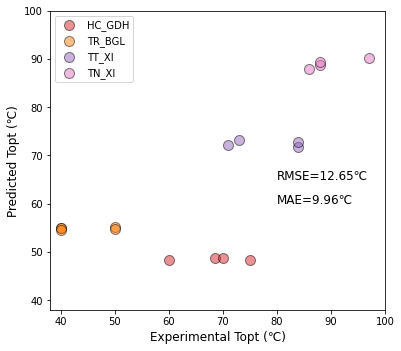

In [51]:
fig,ax = plt.subplots(figsize=(6,5.5))
ax.scatter( gdh_data['topt'],gdh_data['pred_topt'],s=100,alpha=0.5,
           edgecolor='black',linewidth=1,color='tab:red',label='HC_GDH')
ax.scatter( trbgl_data['topt'],trbgl_data['pred_topt'],alpha=0.5,
           edgecolor='black',linewidth=1,s=100,color='tab:orange',label='TR_BGL')
ax.scatter( xi_data['topt'][:4],xi_data['pred_topt'][:4],alpha=0.5,
           edgecolor='black',linewidth=1,s=100,color='tab:purple',label='TT_XI')
ax.scatter( xi_data['topt'][4:],xi_data['pred_topt'][4:],alpha=0.5,
           edgecolor='black',linewidth=1,s=100,color='tab:pink',label='TN_XI')
ax.set_xlim([38,100]); ax.set_ylim([38,100])
ax.legend()
ax.set_xlabel('Experimental Topt (\u2103)',fontsize=12); ax.set_ylabel('Predicted Topt (\u2103)',fontsize=12)
ax.text(x=80,y=65,s='RMSE=12.65\u2103',fontsize=12)
ax.text(x=80,y=60,s='MAE=9.96\u2103',fontsize=12)
# plt.savefig('../../../Topt_paper/Figures/pred_mut_accuracy.svg',format='svg',dpi=150)

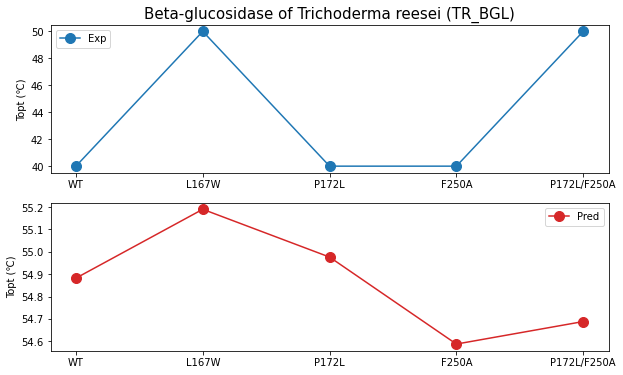

In [52]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
axs[0].plot(trbgl_data.mutation, trbgl_data.topt,marker='o',markersize=10,label='Exp')
axs[0].set_title('Beta-glucosidase of Trichoderma reesei (TR_BGL)',fontsize=15)
axs[1].plot(trbgl_data.mutation, trbgl_data.pred_topt, color='tab:red',
            marker='o',markersize=10,label='Pred')
for ax in axs:
    ax.set_ylabel('Topt (\u2103)')
    ax.legend()
# plt.savefig('../../../Topt_paper/Figures/trbgl_accuracy.svg',format='svg',dpi=150)

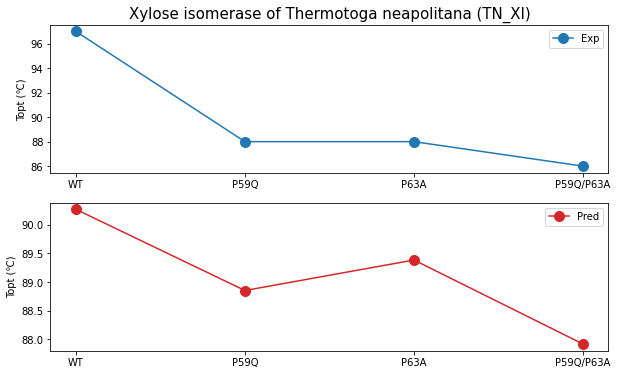

In [53]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
axs[0].plot(xi_data['mutation'][4:], xi_data['topt'][4:],marker='o',
            markersize=10,label='Exp')
axs[0].set_title('Xylose isomerase of Thermotoga neapolitana (TN_XI)',fontsize=15)
axs[1].plot(xi_data['mutation'][4:], xi_data['pred_topt'][4:], color='tab:red',
            marker='o', markersize=10,label='Pred')
for ax in axs:
    ax.set_ylabel('Topt (\u2103)')
    ax.legend()
# plt.savefig('../../../Topt_paper/Figures/tnxi_accuracy.svg',format='svg',dpi=150)

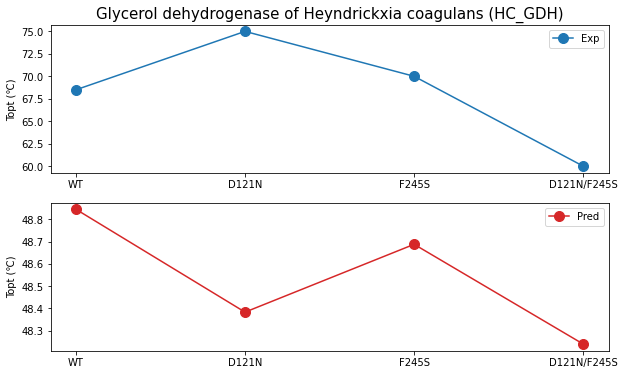

In [5]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
axs[0].plot(gdh_data.mutation, gdh_data.topt,marker='o',markersize=10,label='Exp')
axs[0].set_title('Glycerol dehydrogenase of Heyndrickxia coagulans (HC_GDH)',fontsize=15)
axs[1].plot(gdh_data.mutation, gdh_data.pred_topt, color='tab:red',
            marker='o',markersize=10,label='Pred')
for ax in axs:
    ax.set_ylabel('Topt (\u2103)')
    ax.legend()

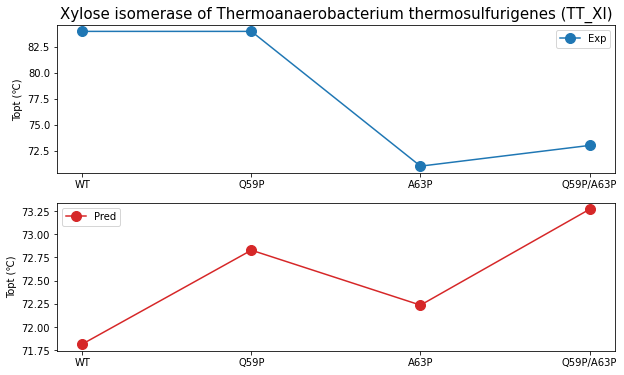

In [6]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
axs[0].plot(xi_data['mutation'][:4], xi_data['topt'][:4],marker='o',
            markersize=10,label='Exp')
axs[0].set_title('Xylose isomerase of Thermoanaerobacterium thermosulfurigenes (TT_XI)',fontsize=15)
axs[1].plot(xi_data['mutation'][:4], xi_data['pred_topt'][:4], color='tab:red',
            marker='o', markersize=10,label='Pred')
for ax in axs:
    ax.set_ylabel('Topt (\u2103)')
    ax.legend()

# Visualize attention weights

In [9]:
trbgl_data = pd.read_csv('../data/casestudy/TrBgl_data.csv')
trbgl_weights = load_pickle('../data/casestudy/trbgl_weights.pkl')

In [25]:
wt_weights = trbgl_weights[0][1:-1]
mut_sites = [167,172,250]; y=[];
for site in mut_sites:
    site = site - 1
    y.append( wt_weights[site] )

Text(0.5, 0, 'Residue position')

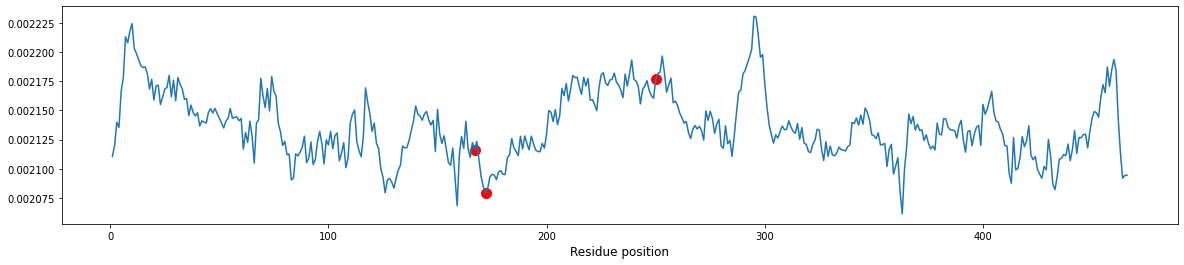

In [29]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(np.arange(1,467), wt_weights)
ax.scatter( mut_sites, y, color='red',s=100)
ax.set_xlabel('Residue position',fontsize=12)

In [39]:
tnxi_weights = load_pickle('../data/casestudy/tnxi_weights.pkl')
wt_weights = tnxi_weights[0][1:-1]
tnxi_data = pd.read_csv('../data/casestudy/tnxi_data.csv')

In [41]:
tnxi_data

,uniprot_id,mutation,organism,topt,note,reference,sequence
0,P45687,WT,TN,97,WT,https://doi.org/10.1093/protein/13.4.259,MAEFFPEIPKVQFEGKESTNPLAFKFYDPEEIIDGKPLKDHLKFSV...
1,P45687,P59Q,TN,88,Pro58Gln,https://doi.org/10.1093/protein/13.4.259,MAEFFPEIPKVQFEGKESTNPLAFKFYDPEEIIDGKPLKDHLKFSV...
2,P45687,P63A,TN,88,Pro62Ala,https://doi.org/10.1093/protein/13.4.259,MAEFFPEIPKVQFEGKESTNPLAFKFYDPEEIIDGKPLKDHLKFSV...
3,P45687,P59Q/P63A,TN,86,Pro58Gln/Pro62Ala,https://doi.org/10.1093/protein/13.4.259,MAEFFPEIPKVQFEGKESTNPLAFKFYDPEEIIDGKPLKDHLKFSV...


In [42]:
mut_sites = [59,63]; y=[];
for site in mut_sites:
    site = site - 1
    y.append( wt_weights[site] )

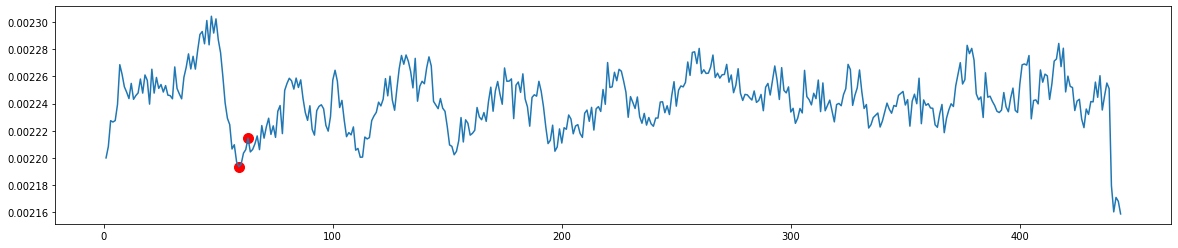

In [43]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(np.arange(1,len(tnxi_data['sequence'][0])+1), wt_weights)
ax.scatter( mut_sites, y, color='red',s=100)